<a href="https://colab.research.google.com/github/Murali-11104/MovieRecomendationSystem/blob/main/recomendationsystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 2.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357282 sha256=c01b1ad52ab3c1a953188ad03cad88f51d6290e4c6033cb03326dc0bde03b207
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


Dataset ml-100k could not be found. Do you want to download it? [Y/n] y
Trying to download dataset from https://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k
  user_id movie_id  rating  timestamp
0     196      242     3.0  881250949
1     186      302     3.0  891717742
2      22      377     1.0  878887116
3     244       51     2.0  880606923
4     166      346     1.0  886397596
Number of unique users: 943
Number of unique movies: 1682
Total number of ratings: 100000


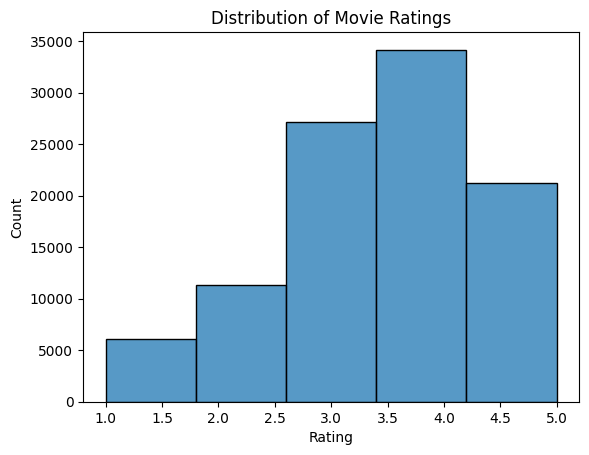

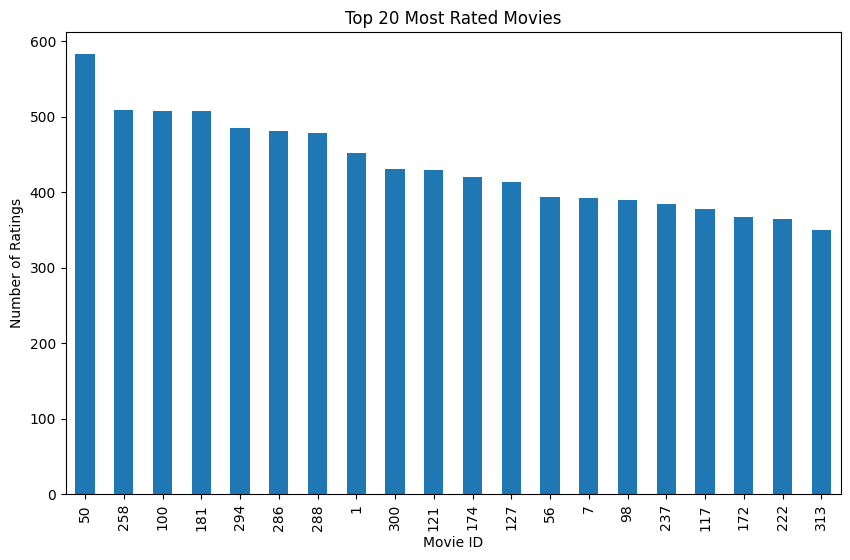

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9367  0.9402  0.9348  0.9324  0.9351  0.9358  0.0026  
MAE (testset)     0.7393  0.7410  0.7363  0.7372  0.7376  0.7383  0.0017  
Fit time          1.30    1.32    1.30    1.34    1.33    1.32    0.02    
Test time         0.24    0.11    0.12    0.35    0.11    0.19    0.09    
Predicted rating for user 196 and movie 302: 4.211545866268138


In [2]:
# Title of Project: Movie Recommendation System

# Objective:
# Build a recommendation system to suggest movies to users based on their past ratings using collaborative filtering.

# Data Source:
# The dataset is from the MovieLens 100k ratings dataset, which contains 100,000 ratings from 943 users on 1,682 movies.

# Import Library
import pandas as pd
import numpy as np
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise.model_selection import cross_validate
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data
# The dataset is loaded directly from Surprise's built-in dataset
data = Dataset.load_builtin('ml-100k')

# Describe Data
# Convert the Surprise dataset to Pandas DataFrame for analysis
df = pd.DataFrame(data.raw_ratings, columns=['user_id', 'movie_id', 'rating', 'timestamp'])
print(df.head())
print(f"Number of unique users: {df['user_id'].nunique()}")
print(f"Number of unique movies: {df['movie_id'].nunique()}")
print(f"Total number of ratings: {len(df)}")

# Data Visualization
# Plot distribution of movie ratings
sns.histplot(df['rating'], bins=5, kde=False)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Plot number of ratings per movie
movie_ratings_count = df.groupby('movie_id')['rating'].count().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
movie_ratings_count.head(20).plot(kind='bar')
plt.title('Top 20 Most Rated Movies')
plt.xlabel('Movie ID')
plt.ylabel('Number of Ratings')
plt.show()

# Data Preprocessing
# No major preprocessing is required since we are using Surprise, which handles matrix factorization directly.

# Define Target Variable (y) and Feature Variables (X)
# For recommendation systems, we don't explicitly define y and X as in typical ML problems.
# The model learns to predict ratings based on user-item interactions.

# Train Test Split
trainset, testset = train_test_split(data, test_size=0.2)

# Modeling
# Using SVD (Singular Value Decomposition) for collaborative filtering
algo = SVD()

# Train the model on the training set
algo.fit(trainset)

# Model Evaluation
# Evaluate the performance using cross-validation
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Prediction
# Predict ratings for a specific user and movie
user_id = '196'  # Example user ID
movie_id = '302'  # Example movie ID
prediction = algo.predict(user_id, movie_id)
print(f"Predicted rating for user {user_id} and movie {movie_id}: {prediction.est}")

# Explaination
# This model is using SVD, a matrix factorization technique, which reduces the dimensions of the user-item matrix
# by decomposing it into user and item feature matrices. The algorithm learns latent features of users and movies,
# which are used to predict a user's rating for movies they haven't rated yet.
# After training, the model can recommend movies to users by predicting the ratings for unrated movies.